# Tarefa 01

#### 1. Cite 5 diferenças entre o Random Forest e o AdaBoost
#### 2. Acesse o link [Scikit-learn– adaboost](https://scikit-learn.org/stable/modules/ensemble.html), leia a explicação (traduza se for preciso) e crie um jupyter notebook contendo o exemplo do AdaBoost
#### 3. Cite 5 Hyperparametros importantes no AdaBoost.
#### 4. (Opcional) Utilize o GridSearch para encontrar os melhores hyperparametros para o conjunto de dados do exemplo (load_iris)

----------------------------------------
#### 1. Cite 5 diferenças entre o Random Forest e o AdaBoost

| Descrição            | Random Forest                                         | AdaBoost  |
| ---------------------------- |:-------------------------------------------:| -----------------------:|
| Profundidade da árvore| Pode variar em profundidade |Profundidade igual a 1|
| Relação entre as árvores| Independentes |Dependentes, uma influencia a outra|
| Peso das Árvores| Pesos iguais |Pesos diferentes com base na precisão|
| Eficiência Computacional|  árvores podem ser construídas em paralelo |árvores sequencialmente, o que pode ser mais lento|
| Outliers e Ruídos|Tende a ser mais robusta pela independência das árvores  | Pode ser mais sensível se o peso maior for para os Outliers e Ruídos  |


#### 2. Acesse o link [Scikit-learn– adaboost](https://scikit-learn.org/stable/modules/ensemble.html), leia a explicação (traduza se for preciso) e crie um jupyter notebook contendo o exemplo do AdaBoost

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Gerando variável 'iris' como os 'target_names'
iris = load_iris()
# Separando as variáveis explicativas da variável resposta
X, y = load_iris(return_X_y=True)

In [3]:
# Visualizando valores de X
pd.DataFrame(X, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Visualizando valores de y
df_y = pd.DataFrame(y)
df_y = df_y.rename(columns = {0:"target"})
df_y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [5]:
# Criando o classificador Adaboost
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME",)

In [6]:
# Realizando validação cruzada
scores = cross_val_score(clf, X, y, cv=5)

In [7]:
# Visualizando a média da pontuação de cada fold
scores.mean()

0.9533333333333334

In [8]:
# Realizando as previsões com a validação cruzada
previsao = cross_val_predict(clf, X, y, cv=5)

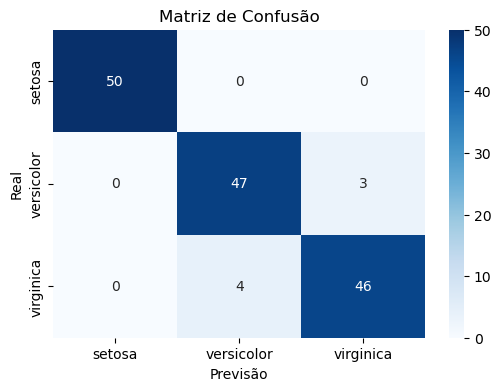

In [9]:
# Visualizando a matriz de classificação
plt.figure(figsize=(6,4))
m_confusao = confusion_matrix(y, previsao)
sns.heatmap(m_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()


#### 3. Cite 5 Hyperparametros importantes no AdaBoost.

1. algorithm: determina o método para classificar os pesos dos classificadores;
2. learning_rate: Peso aplicado a cada classificador em cada iteração de reforço;
3. n_estimators: O número máximo de estimadores em que o aumento é encerrado;
4. random_state: Controla a semente aleatória dada em cada em cada impulsionando a iteração; e
5. base_estimator: algoritmo adotado para o estimador.

#### 4. (Opcional) Utilize o GridSearch para encontrar os melhores hyperparametros para o conjunto de dados do exemplo (load_iris)

In [10]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
# Gerando variável 'iris' como os 'target_names'
iris = load_iris()
# Separando as variáveis explicativas da variável resposta
X, y = load_iris(return_X_y=True)

In [12]:
# Visualizando valores de X
pd.DataFrame(X, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# Visualizando valores de y
df_y = pd.DataFrame(y)
df_y = df_y.rename(columns = {0:"target"})
df_y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [14]:
# Definindo os parâmetros para teste
parametros = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]}

In [15]:
# Criando o classificador Adaboost
clf1 = AdaBoostClassifier(algorithm="SAMME",)

In [16]:
# Criando o objeto GridSearchCV
grid_parametros = GridSearchCV(clf1, parametros, cv=5)

In [17]:
# Buscando o melhor parâmatro
grid_parametros.fit(X,y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(algorithm='SAMME'),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110]})

In [18]:
# Visualizando o melhor parâmetro
melhor_parametro = grid_parametros.best_params_
melhor_parametro

{'n_estimators': 20}

In [19]:
# Criando o classificador Adaboost para o melhor parâmetro
clf2 = AdaBoostClassifier(n_estimators=20, algorithm="SAMME",)

In [20]:
# Realizando validação cruzada para o melhor parâmetro
scores = cross_val_score(clf2, X, y, cv=5)

In [21]:
# Visualizando a média da pontuação de cada fold
scores.mean()

0.96

In [22]:
# Realizando as previsões com a validação cruzada
previsao = cross_val_predict(clf2, X, y, cv=5)

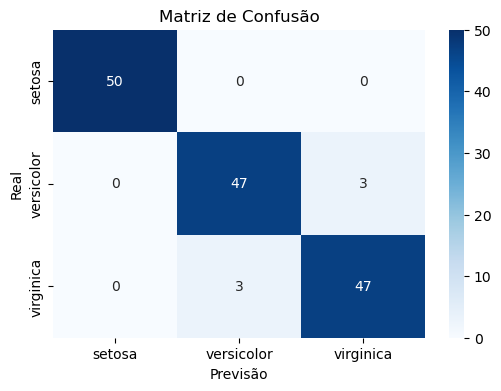

In [23]:
# Visualizando a matriz de classificação para o melhor parâmetro
plt.figure(figsize=(6,4))
m_confusao = confusion_matrix(y, previsao)
sns.heatmap(m_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()